# Greyscale Image Dimensionality Reduction

*Our goal is to compress a greyscale image by reducing the amount of pixels needed for its formation via PCA. First, let us import the project dependencies.*

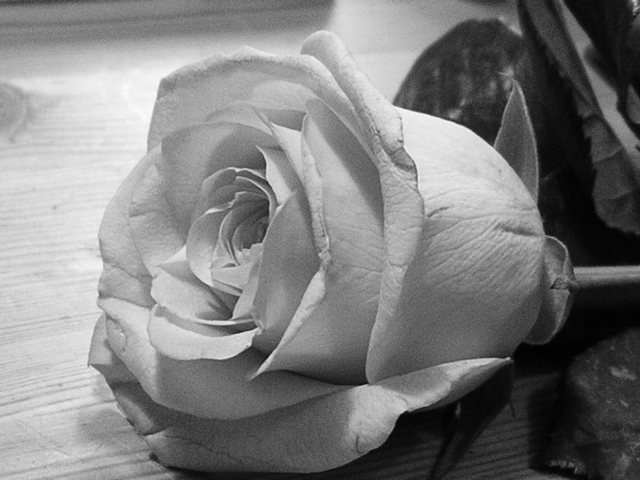

In [1]:
import numpy as np
from PIL import Image
from IPython.display import display

im = Image.open('greyscaleRose.jpg')
display(im)

*Convert the image to a numpy array. Note the pixel values for a greyscale image are in the range [0, 255], also known as uint8.*

In [2]:
array = np.array(im)
array.shape

(480, 640)

In [3]:
array

array([[ 94, 101,  95, ..., 117,  88,  68],
       [ 84,  89,  84, ..., 112, 101,  75],
       [ 77,  73,  70, ..., 108, 103,  73],
       ...,
       [187, 185, 190, ...,  48,  55,  49],
       [192, 190, 188, ...,  56,  65,  50],
       [196, 194, 193, ...,  53,  52,  47]], dtype=uint8)

*Treat this as array as having 640 observations with each being 480 dimensional. Now, we need to find the mean of each dimension (row) and resize it to the same size as the original array. We will do the same for the standard deviation and use both to demean and standardise the data*

In [4]:
rawMean = np.mean(array, axis = 1)
mean = np.zeros(shape=(array.shape[0],array.shape[1]))

for i in range(array.shape[0]):
    temp = [rawMean[i]] * array.shape[1]
    mean[i] = temp

print(mean)
print(mean.shape)

[[100.0375    100.0375    100.0375    ... 100.0375    100.0375
  100.0375   ]
 [101.0953125 101.0953125 101.0953125 ... 101.0953125 101.0953125
  101.0953125]
 [103.334375  103.334375  103.334375  ... 103.334375  103.334375
  103.334375 ]
 ...
 [ 70.1078125  70.1078125  70.1078125 ...  70.1078125  70.1078125
   70.1078125]
 [ 71.146875   71.146875   71.146875  ...  71.146875   71.146875
   71.146875 ]
 [ 71.7734375  71.7734375  71.7734375 ...  71.7734375  71.7734375
   71.7734375]]
(480, 640)


In [5]:
rawStdDev = np.var(array, axis = 1)**0.5
stdDev = np.zeros(shape=(array.shape[0],array.shape[1]))

for i in range(array.shape[0]):
    temp = [rawStdDev[i]] * array.shape[1]
    stdDev[i] = temp

print(stdDev)
print(stdDev.shape)

[[46.81825065 46.81825065 46.81825065 ... 46.81825065 46.81825065
  46.81825065]
 [47.2104197  47.2104197  47.2104197  ... 47.2104197  47.2104197
  47.2104197 ]
 [47.28289932 47.28289932 47.28289932 ... 47.28289932 47.28289932
  47.28289932]
 ...
 [60.03956457 60.03956457 60.03956457 ... 60.03956457 60.03956457
  60.03956457]
 [59.06339541 59.06339541 59.06339541 ... 59.06339541 59.06339541
  59.06339541]
 [58.6017831  58.6017831  58.6017831  ... 58.6017831  58.6017831
  58.6017831 ]]
(480, 640)


In [6]:
Xbar = (array - mean)/stdDev
Xbar

array([[-1.28956121e-01,  2.05582222e-02, -1.07596929e-01, ...,
         3.62305293e-01, -2.57111272e-01, -6.84295110e-01],
       [-3.62108886e-01, -2.56200063e-01, -3.62108886e-01, ...,
         2.30980524e-01, -2.01888695e-03, -5.52744768e-01],
       [-5.56953473e-01, -6.41550654e-01, -7.04998540e-01, ...,
         9.86746808e-02, -7.07179561e-03, -6.41550654e-01],
       ...,
       [ 1.94691931e+00,  1.91360794e+00,  1.99688636e+00, ...,
        -3.68220733e-01, -2.51630947e-01, -3.51565050e-01],
       [ 2.04615946e+00,  2.01229754e+00,  1.97843561e+00, ...,
        -2.56451139e-01, -1.04072496e-01, -3.58036900e-01],
       [ 2.11984271e+00,  2.08571405e+00,  2.06864973e+00, ...,
        -3.20356080e-01, -3.37420407e-01, -4.22742043e-01]])

**With our newly demeaned and standardised data, let us calculate the covariance matrix**

In [7]:
S = (Xbar @ Xbar.T)/Xbar.shape[1]
S

array([[ 1.        ,  0.99166815,  0.97324497, ..., -0.16844776,
        -0.18421206, -0.2023364 ],
       [ 0.99166815,  1.        ,  0.98959251, ..., -0.16082328,
        -0.17476874, -0.1919461 ],
       [ 0.97324497,  0.98959251,  1.        , ..., -0.1299935 ,
        -0.14486009, -0.16312867],
       ...,
       [-0.16844776, -0.16082328, -0.1299935 , ...,  1.        ,
         0.99168899,  0.97730621],
       [-0.18421206, -0.17476874, -0.14486009, ...,  0.99168899,
         1.        ,  0.99247435],
       [-0.2023364 , -0.1919461 , -0.16312867, ...,  0.97730621,
         0.99247435,  1.        ]])

*Find the eigenvalues & eigenvectors of S and sort them in descending order. Note that numpy returns the normalized eigenvectors*

In [8]:
eigvals, eigvecs = np.linalg.eig(S)
sort_indices = np.argsort(eigvals)[::-1]
eigvals = eigvals[sort_indices]
eigvecs = eigvecs[:, sort_indices]

*Obtain the 40 largest eigenvalues and their corresponding eigenvectors. Create the basis B and use it to find the projection matrix. We do not need to use P = B @ np.linalg.inv(B.T @ B) @ B.T as B's column vectors are orthogonal. We can easily check that B.T @ B is very close to the identity matrix.*

**Use the projection matrix to find our solution and display the resulting image. This image can be represented as a 20 dimensional object but we have turned it into it original size for viewing purposes. From 480, we now only need 20 dimensions to display the image which can still be made out to be a flower by the naked eye!**

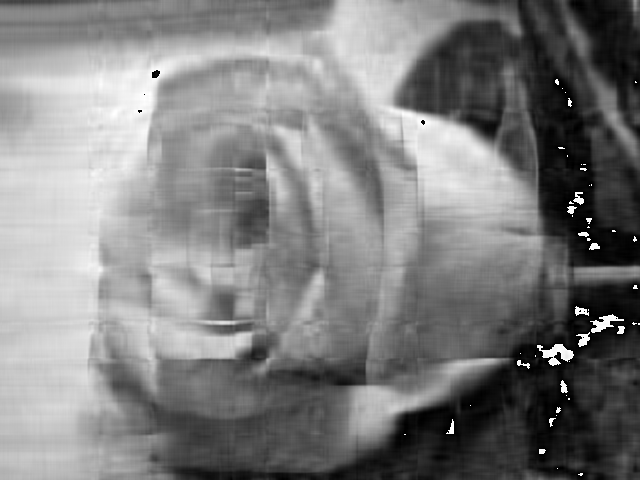

In [9]:
principal_vals, principal_components = eigvals[:20], eigvecs[:, :20]
B = principal_components
P = B @ B.T
projection = (P @ Xbar) * stdDev + mean
projection = projection.astype(np.uint8)
display(Image.fromarray(projection))

### This is essentially what the implementation in scikit learn does as shown below.

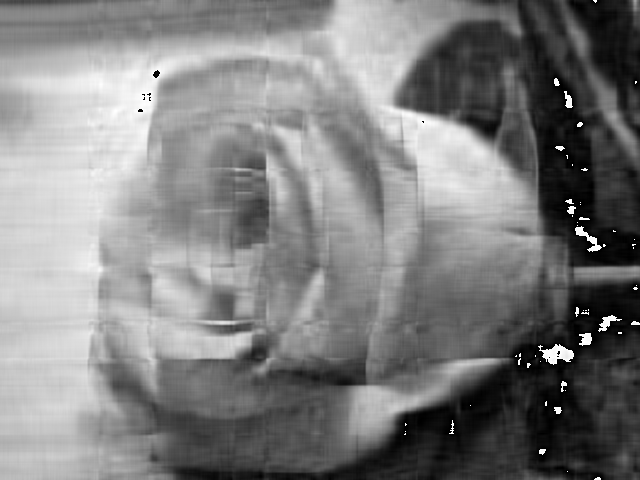

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
code = pca.fit_transform(Xbar)
projection = (pca.inverse_transform(code) * stdDev + mean)
projection = projection.astype(np.uint8)

display(Image.fromarray(projection))